<a href="https://colab.research.google.com/github/KEIEK10/AI_learning/blob/main/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#シンプルなディープラーニング

##データの読み込み

In [2]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [4]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

t = np_utils.to_categorical(iris.target)
print(t[:30])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

print(t_train.shape)

(112, 3)


##モデルの構築

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainabl

In [11]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.1992 - accuracy: 0.0804
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 1.1057 - accuracy: 0.2679
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0289 - accuracy: 0.4286
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9622 - accuracy: 0.6429
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9023 - accuracy: 0.7411
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.7857
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7977 - accuracy: 0.8304
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7517 - accuracy: 0.8393
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.8482
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.8393
Epoch 11/30
14/14 [

##学習の推移

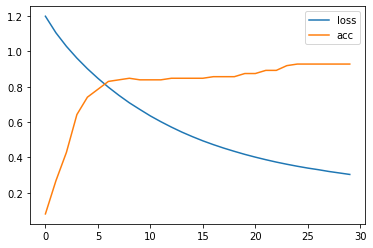

In [13]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

plt.plot(np.arange(len(hist_loss)),hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)),hist_acc, label='acc')
plt.legend()

plt.show()

##評価

In [14]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.2996 - accuracy: 0.8947
0.2996103763580322 0.8947368264198303


##予測

In [15]:
model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


array([[0.9698033 , 0.01953395, 0.01066275],
       [0.11743294, 0.39441472, 0.4881524 ],
       [0.97421587, 0.01777238, 0.00801187],
       [0.94324744, 0.03894001, 0.01781257],
       [0.9374267 , 0.05063761, 0.01193563],
       [0.06650797, 0.33473736, 0.59875476],
       [0.9900267 , 0.00649081, 0.0034825 ],
       [0.961061  , 0.02646334, 0.01247554],
       [0.03626267, 0.1648514 , 0.7988859 ],
       [0.05826135, 0.24018262, 0.70155597],
       [0.97587603, 0.01688245, 0.00724152],
       [0.10720807, 0.78320783, 0.1095841 ],
       [0.04121944, 0.12852602, 0.83025455],
       [0.01861504, 0.08733487, 0.89405   ],
       [0.96647817, 0.02181662, 0.01170508],
       [0.04601146, 0.27069414, 0.6832944 ],
       [0.07871576, 0.28223258, 0.63905156],
       [0.07925199, 0.30016416, 0.62058383],
       [0.02976004, 0.09838387, 0.87185603],
       [0.04374914, 0.36105317, 0.5951977 ],
       [0.96604943, 0.02380948, 0.010141  ],
       [0.07628986, 0.28410137, 0.63960886],
       [0.

##学習済みモデルの保存

In [16]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')